# Detecção e análise de rostos

As soluções de Pesquisa Visual Computacional normalmente exigem que uma solução de inteligência artificial (IA) seja capaz de detectar, analisar ou identificar rostos humanos. Por exemplo, suponha que a empresa de varejo Northwind Traders tenha decidido implementar uma "loja inteligente", em que serviços de IA monitorem a loja para identificar clientes que precisam de ajuda e direcionem funcionários para ajudá-los. Uma maneira de fazer isso é realizando detecção e análise facial (em outras palavras, determinar se existe algum rosto nas imagens e, em caso positivo, analisar suas características).

![Um robô analisando um rosto](./images/face_analysis.jpg)

## Usar o serviço cognitivo Detecção Facial para detectar rostos

Suponha que o sistema de loja inteligente que a Northwind Traders quer criar precise ser capaz de detectar clientes e analisar suas características faciais. No Microsoft Azure, você pode usar a **Detecção Facial**, parte dos Serviços Cognitivos do Azure para fazer isso.

### Criar um recurso dos Serviços Cognitivos

Vamos começar criando um recurso dos **Serviços Cognitivos** na sua assinatura do Azure.

> **Observação**: Se você já tiver um recurso dos Serviços Cognitivos, abra a página de **Início Rápido** no portal do Azure e copie a respectiva chave e o ponto de extremidade para a célula abaixo. Caso contrário, siga as etapas abaixo para criar um.

1. Em outra guia do navegador, abra o portal do Azure em https://portal.azure.com, entrando com sua conta Microsoft.
2. Clique no botão **&#65291;Criar um recurso**, procure *Serviços Cognitivos* e crie um recurso dos **Serviços Cognitivos** com as configurações abaixo:
    - **Assinatura**: *sua assinatura do Azure*.
    - **Grupo de recursos**: *Selecione ou crie um grupo de recursos com um nome exclusivo*.
    - **Região**: *Escolha qualquer região disponível*:
    - **Nome**: *Insira um nome exclusivo*.
    - **Tipo de preço**: S0
    - **Confirmo que li e entendi os avisos**: Selecionado.
3. Aguarde até que a implantação seja concluída. Depois, entre em seu recurso dos Serviços Cognitivos e, na página **Visão geral**, clique no link para gerenciar as chaves do serviço. Você precisará do ponto de extremidade e das chaves para se conectar aos seus recursos dos Serviços Cognitivos em aplicativos clientes.

### Obter a chave e o ponto de extremidade do seu recurso dos Serviços Cognitivos

Para usar seu recurso dos Serviços Cognitivos, os aplicativos clientes precisam do ponto de extremidade e da chave de autenticação:

1. No portal do Azure, na página **Chaves e ponto de extremidade** do seu recurso dos Serviços Cognitivos, copie a **Chave 1** do recurso e cole no código abaixo, substituindo **YOUR_COG_KEY**.

2. Copie o **ponto de extremidade** do recurso e cole no código abaixo, substituindo **YOUR_COG_ENDPOINT**.

3. Execute o código abaixo clicando no botão Executar célula <span>&#9655;</span> (no canto superior esquerdo da célula).

In [1]:
cog_key = '558adc4074d64d28b8aefbd0d8453081'
cog_endpoint = 'https://face-hsouza.cognitiveservices.azure.com/'

print('Ready to use cognitive services at {} using key {}'.format(cog_endpoint, cog_key))

Ready to use cognitive services at https://face-hsouza.cognitiveservices.azure.com/ using key 558adc4074d64d28b8aefbd0d8453081


Agora que você tem um recurso dos Serviços Cognitivos, pode usar o serviço de Detecção Facial para detectar rostos humanos na loja.

Execute a célula de código abaixo para ver um exemplo.

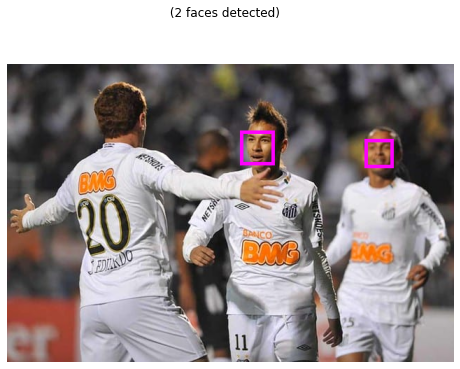

In [3]:
from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials
from python_code import faces
import os
%matplotlib inline

# Criar um cliente de detecção facial.
face_client = FaceClient(cog_endpoint, CognitiveServicesCredentials(cog_key))

# Abrir uma imagem
image_path = os.path.join('data', 'face', 'santos1.jpg')
image_stream = open(image_path, "rb")

# Detectar rostos
detected_faces = face_client.face.detect_with_stream(image=image_stream)

# Exibir os rostos (código em python_code/faces.py)
faces.show_faces(image_path, detected_faces)

Cada rosto detectado recebe uma ID exclusiva, assim o aplicativo pode identificar cada um deles.

Execute a célula abaixo para ver as IDs dos rostos de outros compradores.

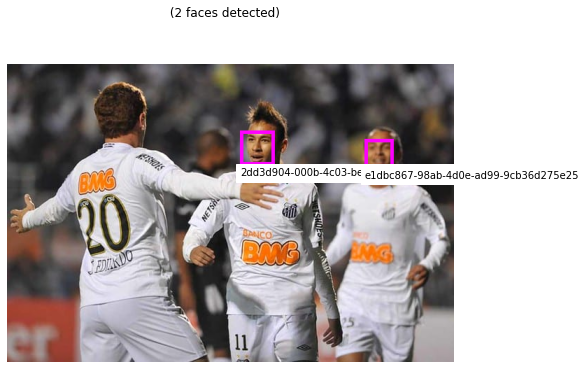

In [4]:
# Abrir uma imagem
image_path = os.path.join('data', 'face', 'santos1.jpg')
image_stream = open(image_path, "rb")

# Detectar rostos
detected_faces = face_client.face.detect_with_stream(image=image_stream)

# Exibir os rostos (código em python_code/faces.py)
faces.show_faces(image_path, detected_faces, show_id=True)

## Analisar atributos faciais

A Detecção Facial pode fazer muito mais do que simplesmente detectar rostos. Ela pode analisar características e expressões faciais para sugerir a idade e o estado emocional da pessoa. Por exemplo, execute o código abaixo para analisar os atributos faciais de um comprador.

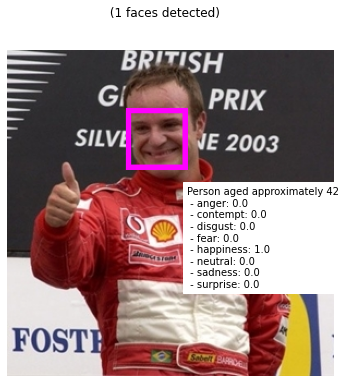

In [8]:
# Abrir uma imagem
image_path = os.path.join('data', 'face', 'rubensFeliz.jpg')
image_stream = open(image_path, "rb")

# Detectar rostos e atributos faciais especificados
attributes = ['age', 'emotion']
detected_faces = face_client.face.detect_with_stream(image=image_stream, return_face_attributes=attributes)

# Exibir os rostos e atributos (código em python_code/faces.py)
faces.show_face_attributes(image_path, detected_faces)

Com base nas pontuações de emoção detectadas para o cliente na imagem, ele parece estar muito feliz com a experiência de compra.

## Encontrar rostos similares 

As IDs dos rostos que são criadas para face detectada são usadas para identificar detecções faciais individualmente. Você pode usar essas IDs para comparar um rosto detectado com rostos identificados anteriormente e com características semelhantes.

Por exemplo, execute a célula abaixo para comparar o comprador de uma imagem com compradores de outra e encontrar um rosto compatível.

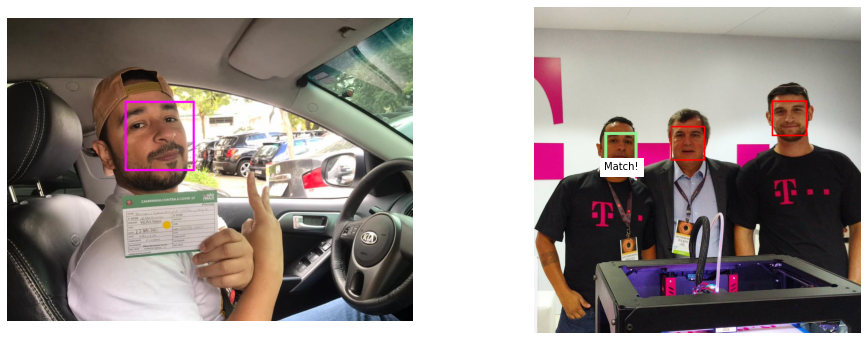

In [15]:
# Obter a ID do primeiro rosto da imagem 1
image_1_path = os.path.join('data', 'face', 'store_cam2.jpg')
image_1_stream = open(image_1_path, "rb")
image_1_faces = face_client.face.detect_with_stream(image=image_1_stream)
face_1 = image_1_faces[0]

# Obter as IDs dos rostos da segunda imagem
image_2_path = os.path.join('data', 'face', 'eu.jpg')
image_2_stream = open(image_2_path, "rb")
image_2_faces = face_client.face.detect_with_stream(image=image_2_stream)
image_2_face_ids = list(map(lambda face: face.face_id, image_2_faces))

# Encontrar rostos na imagem 2 parecidos com o da imagem 1
similar_faces = face_client.face.find_similar(face_id=face_1.face_id, face_ids=image_2_face_ids)

# Exibir o rosto da imagem 1 e os rostos semelhantes da imagem 2 (código em python_code/face.py)
faces.show_similar_faces(image_1_path, face_1, image_2_path, image_2_faces, similar_faces)